In [52]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [53]:
IMG_CHANNELS, IMG_WIDTH, IMG_HEIGHT = 3, 512, 512

In [54]:
X = next(os.walk('C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/images'))[2]
y = next(os.walk('C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/masks'))[2]


In [55]:
X_ids = X[:-10]
y_ids = y[:-10]

In [56]:
import os
import numpy as np
import tensorflow as tf

# Initialize arrays with appropriate shapes
X_train = np.zeros((len(X_ids), 256, 256, 3), dtype=np.float32)
y_train = np.zeros((len(y_ids), 256, 256, 1), dtype=bool)  # Use bool instead of np.bool

# Loop through the image IDs and load the images for X_train
for n, id_ in enumerate(X_ids):
    image_path = f'C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/images/{id_}'
    if os.path.exists(image_path):
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        input_arr = tf.keras.preprocessing.image.img_to_array(image)[90:450,150:406]
        image = tf.keras.preprocessing.image.array_to_img(input_arr).resize((256, 256))
        X_train[n] = np.array(image)
    else:
        print(f"Image file not found: {image_path}")

# Loop through the mask IDs and load the images for y_train
for n, id_ in enumerate(y_ids):
    mask_path = f'C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/masks/{id_}'
    if os.path.exists(mask_path):
        image = tf.keras.preprocessing.image.load_img(mask_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode="grayscale")
        input_arr = tf.keras.preprocessing.image.img_to_array(image)[90:450,150:406]
        image = tf.keras.preprocessing.image.array_to_img(input_arr).resize((256, 256))
        y_train[n] = np.array(image)[:, :, np.newaxis]  # Add new axis for channel dimension
    else:
        print(f"Mask file not found: {mask_path}")


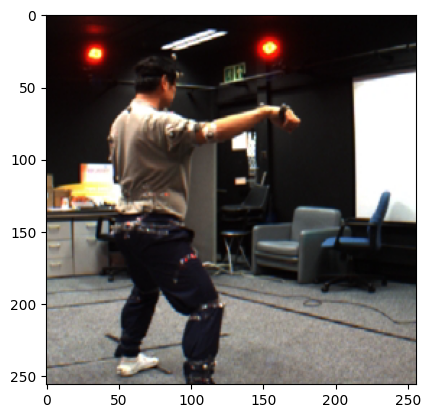

In [13]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(X_train[1000]))

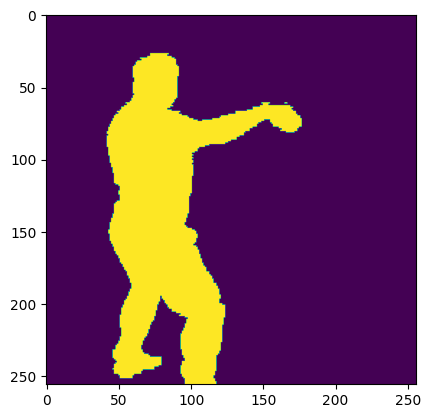

In [57]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(y_train[1000]))

In [15]:
inputs = tf.keras.layers.Input((256, 256, 3))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ lambda[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0] 

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

#### Input Normalization:
The input image, of size 
256
×
256
×
3
256×256×3, is normalized by dividing its pixel values by 255.

Contraction Path (Encoder):
This reduces the spatial dimensions while increasing feature depth:

Block 1: Two convolutional layers with ReLU activation, followed by max pooling.
Block 2: Similar to Block 1 but with 32 filters.
Block 3 and Block 4: Follow the same pattern with increasing filters (64, 128).
Bottom Layer: Processes features at the smallest spatial scale (256 filters).
Expansive Path (Decoder):
This upsamples feature maps to reconstruct the input’s dimensions:

Upsampling: Transposed convolutions double spatial dimensions.
Skip Connections: Concatenate encoder features with upsampled features for rich context.
Convolutions: Repeated convolutional layers refine features.
Output:
A final 
1
×
1
1×1 convolution predicts segmentation probabilities for each pixel (sigmoid activation for binary segmentation).

Model Compilation:
The model uses Adam optimizer, binary cross-entropy loss, and accuracy as a metric.

Summary:
The model.summary() displays the architecture, parameters, and layers.

In [17]:
results = model.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=25)

Epoch 1/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 53s 793ms/step - accuracy: 0.8780 - loss: 0.3876 - val_accuracy: 0.8393 - val_loss: 0.2892
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 55s 816ms/step - accuracy: 0.8936 - loss: 0.2163 - val_accuracy: 0.9200 - val_loss: 0.1709
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9645 - loss: 0.0908 - val_accuracy: 0.9518 - val_loss: 0.1090
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.9751 - loss: 0.0643 - val_accuracy: 0.9697 - val_loss: 0.0790
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.9827 - loss: 0.0443 - val_accuracy: 0.9758 - val_loss: 0.0618
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.9842 - loss: 0.0408 - val_accuracy: 0.9787 - val_loss: 0.0543
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9870 - loss: 0.0329 - val_accuracy: 0.9804 - val_loss: 0.0490
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9886 - loss: 0.0286 - val_accuracy: 0.9818 

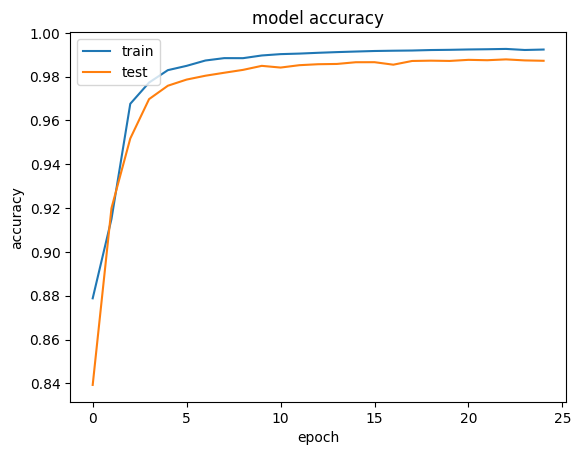

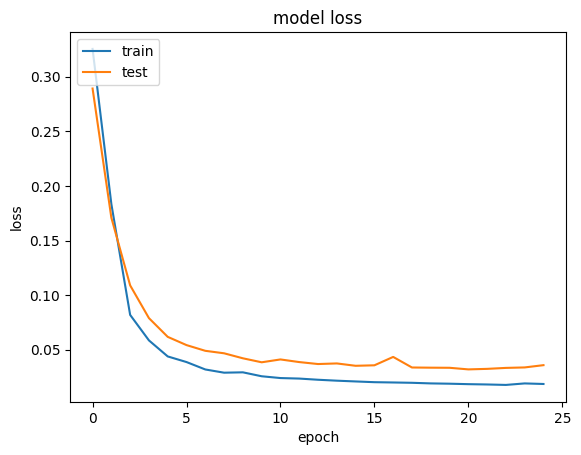

In [18]:
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
import random

test_id = random.choice(X_ids[-10:])
print(test_id)

Taichi_S6_C1_00270.png


In [45]:
img = tf.keras.preprocessing.image.load_img(f"C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/images/{test_id}", target_size=(256, 256))
input_array = tf.keras.preprocessing.image.img_to_array(img)
input_array = np.array([input_array])  # Convert single image to a batch.
predictions = model.predict(input_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


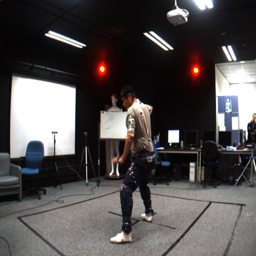

In [46]:
Image.open(f"C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/images/{test_id}").resize((256, 256))

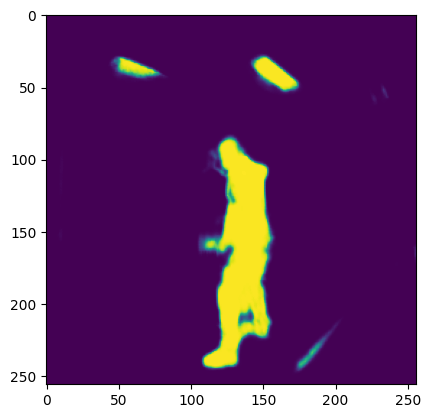

In [48]:

plt.imshow(tf.keras.preprocessing.image.array_to_img(np.squeeze(predictions)[:, :, np.newaxis]))


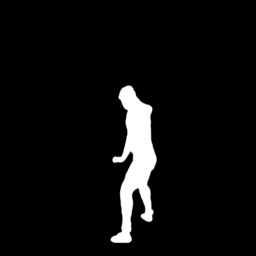

In [49]:

Image.open(f"C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/masks/{test_id}").resize((256 ,256))


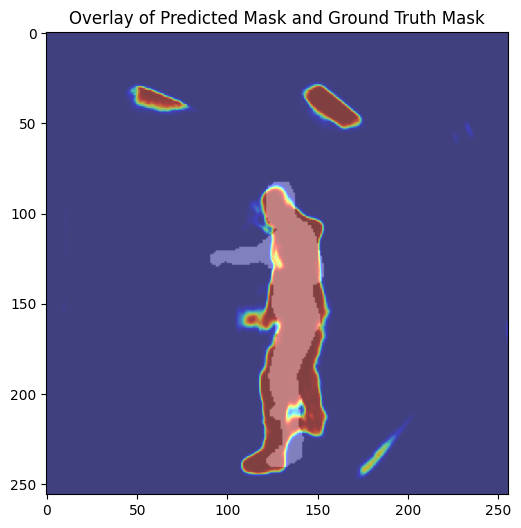

In [55]:
plt.figure(figsize=(6, 6))
plt.imshow(ground_truth_array, cmap="gray", alpha=0.5)
plt.imshow(predicted_mask, cmap="jet", alpha=0.5)  # Overlay the predicted mask on the ground truth
plt.title("Overlay of Predicted Mask and Ground Truth Mask")
plt.show()


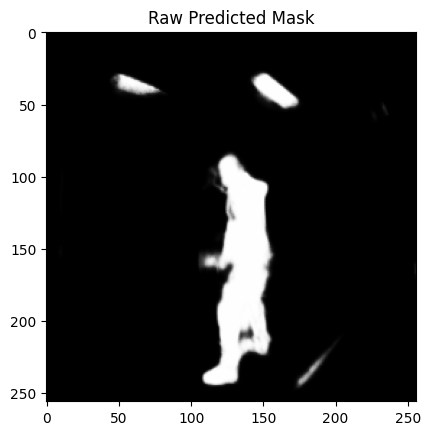

In [56]:
plt.imshow(predicted_mask, cmap="gray")  # See the raw predicted mask (before thresholding)
plt.title("Raw Predicted Mask")
plt.show()


Test ID: Taichi_S6_C1_00270.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Mean IoU = 0.86715734


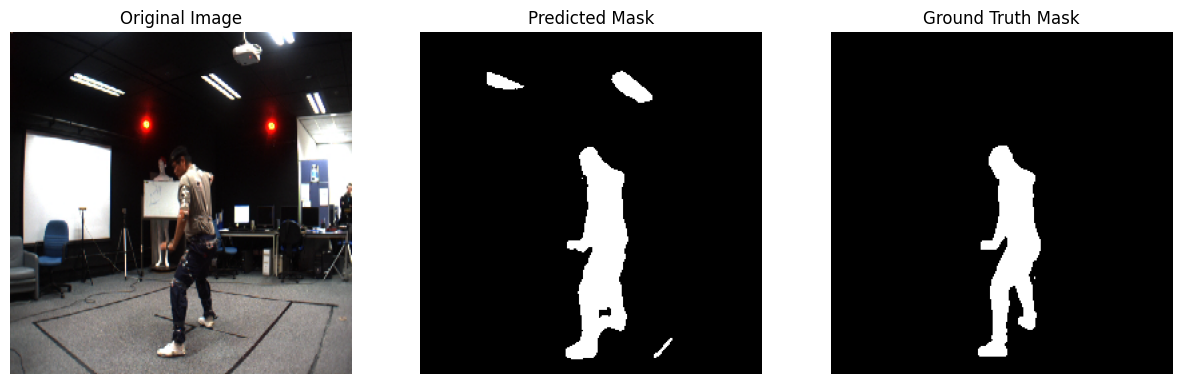

In [58]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.metrics import MeanIoU
import matplotlib.pyplot as plt

# Randomly select a test ID from the last 10 IDs in the dataset
test_id = random.choice(X_ids[-10:])
print(f"Test ID: {test_id}")

# Load the image and resize it to (256, 256)
img_path = f"C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/images/{test_id}"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))
input_array = tf.keras.preprocessing.image.img_to_array(img)
input_array = np.array([input_array])  # Convert single image to a batch

# Predict the mask using the model
predictions = model.predict(input_array)  # Predictions shape: (1, 256, 256, 1)

# Remove batch dimension and the extra channels, make it (256, 256)
predicted_mask = np.squeeze(predictions)  # Shape: (256, 256)

# Apply a threshold to the predicted mask to convert it to binary (0 or 1)
threshold = 0.5  # You can adjust this if necessary
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Load the ground truth mask and resize it to (256, 256)
mask_path = f"C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/masks/{test_id}"
ground_truth_mask = tf.keras.preprocessing.image.load_img(mask_path, target_size=(256, 256), color_mode="grayscale")
ground_truth_array = tf.keras.preprocessing.image.img_to_array(ground_truth_mask)
ground_truth_array = (ground_truth_array > 0.5).astype(np.uint8)  # Convert to binary mask

# Reshape the masks to be (256, 256, 1) for IoU calculation
ground_truth_reshaped = np.expand_dims(ground_truth_array, axis=-1)  # Shape: (256, 256, 1)
predicted_mask_reshaped = np.expand_dims(predicted_mask_binary, axis=-1)  # Shape: (256, 256, 1)

# Define and calculate IoU using Keras MeanIoU metric
n_classes = 2  # 2 classes: background (0) and foreground (1)
IOU_keras = MeanIoU(num_classes=n_classes)

# Update the state with the ground truth and predicted mask
IOU_keras.update_state(ground_truth_reshaped, predicted_mask_reshaped)

# Calculate the mean IoU
print("Mean IoU =", IOU_keras.result().numpy())

# Display the images for visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Predicted mask
axes[1].imshow(predicted_mask_binary, cmap="gray")
axes[1].set_title("Predicted Mask")
axes[1].axis("off")

# Ground truth mask
axes[2].imshow(ground_truth_array, cmap="gray")
axes[2].set_title("Ground Truth Mask")
axes[2].axis("off")

plt.show()


# ______________________________________________________

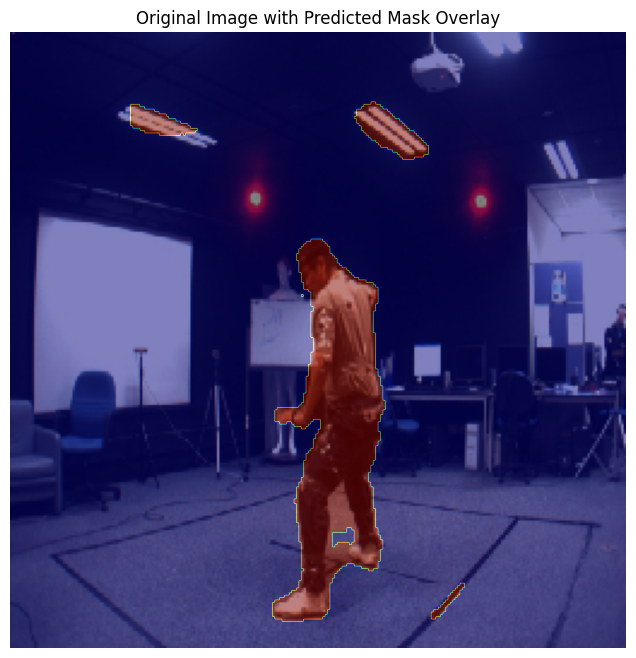

In [59]:
# Plot original image with overlaid predicted mask
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.imshow(predicted_mask_binary, cmap="jet", alpha=0.5)  # Overlay with transparency
plt.title("Original Image with Predicted Mask Overlay")
plt.axis('off')
plt.show()


## Further training to run on external images

In [18]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

# Constants
IMG_SIZE = (256, 256)  # Image and mask size
DATASET_DIR = "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img"
IMAGES_DIR = os.path.join(DATASET_DIR, "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/images")
MASKS_DIR = os.path.join(DATASET_DIR, "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/masks")


In [19]:
import os

# Paths to images and masks
image_dir = "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/images"
mask_dir = "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/masks"

# List files in image and mask directories
image_files = os.listdir(image_dir)
mask_files = os.listdir(mask_dir)

print(f"Number of images: {len(image_files)}")
print(f"Number of masks: {len(mask_files)}")

# Check if file names match (you might need to ensure the names are correctly paired)
print(f"First image file: {image_files[0]}")
print(f"First mask file: {mask_files[0]}")

Number of images: 1192
Number of masks: 1192
First image file: HipHop_HipHop1_C0_00180.png
First mask file: HipHop_HipHop1_C0_00180.png


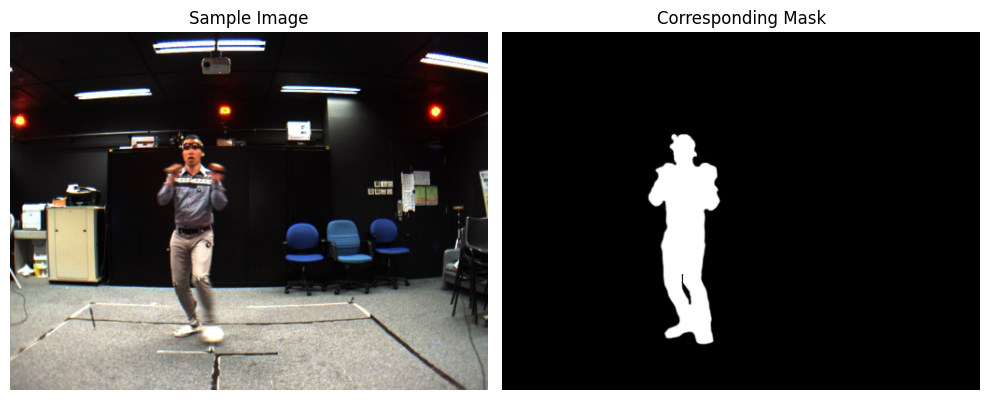

In [20]:
import matplotlib.pyplot as plt
import cv2

# Load a sample image and its corresponding mask
sample_image_path = os.path.join(image_dir, image_files[0])
sample_mask_path = os.path.join(mask_dir, mask_files[0])

sample_image = cv2.imread(sample_image_path)
sample_mask = cv2.imread(sample_mask_path, cv2.IMREAD_GRAYSCALE)

# image and its mask plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.title("Sample Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sample_mask, cmap="gray")
plt.title("Corresponding Mask")
plt.axis("off")

plt.tight_layout()
plt.show()

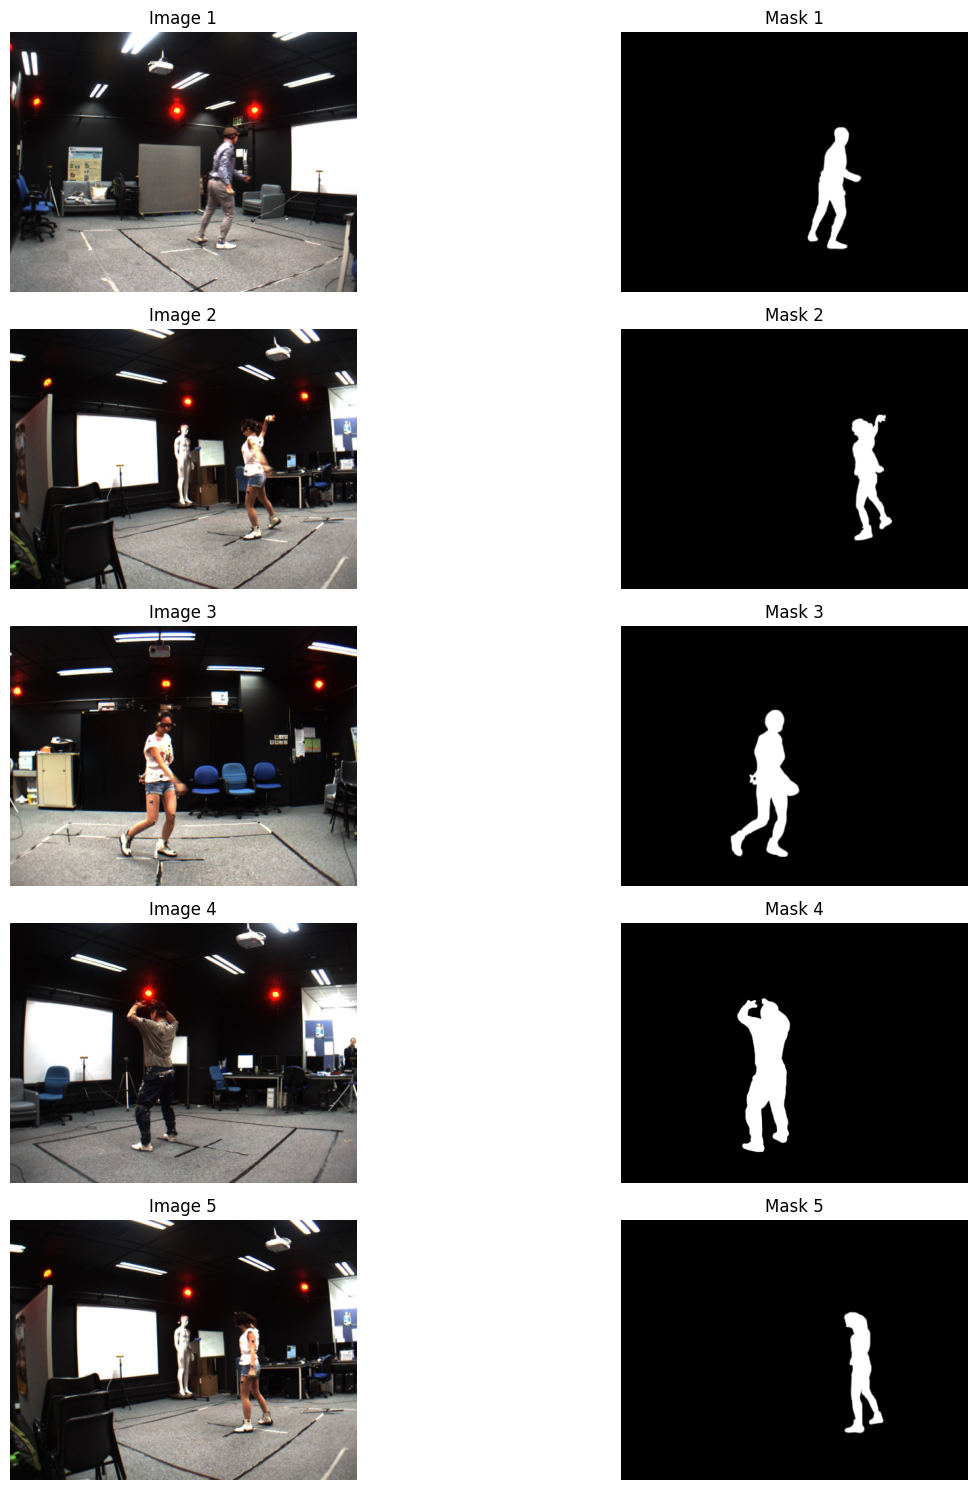

In [21]:
import random

# Display random pairs of images and masks (show 5 pairs)
num_samples = 5
plt.figure(figsize=(15, 15))

for i in range(num_samples):
    random_idx = random.randint(0, len(image_files)-1)
    
    sample_image_path = os.path.join(image_dir, image_files[random_idx])
    sample_mask_path = os.path.join(mask_dir, mask_files[random_idx])

    sample_image = cv2.imread(sample_image_path)
    sample_mask = cv2.imread(sample_mask_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(num_samples, 2, 2*i+1)
    plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1}")
    plt.axis('off')

    plt.subplot(num_samples, 2, 2*i+2)
    plt.imshow(sample_mask, cmap='gray')
    plt.title(f"Mask {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [22]:
def load_images_and_masks(images_dir, masks_dir, img_size):
    image_files = next(os.walk(images_dir))[2]
    mask_files = next(os.walk(masks_dir))[2]

    images, masks = [], []
    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(images_dir, img_file)
        mask_path = os.path.join(masks_dir, mask_file)

        if os.path.exists(img_path) and os.path.exists(mask_path):
            # Load images and masks
            image = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            mask = tf.keras.preprocessing.image.load_img(mask_path, target_size=img_size, color_mode="grayscale")

            images.append(np.array(image))
            masks.append(np.array(mask)[:, :, np.newaxis])  # Add channel dimension
        else:
            print(f"Missing file: {img_file} or {mask_file}")

    return np.array(images, dtype=np.float32), np.array(masks, dtype=bool)

# Load data
X, y = load_images_and_masks(IMAGES_DIR, MASKS_DIR, IMG_SIZE)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training images: {X_train.shape}, Training masks: {y_train.shape}")
print(f"Testing images: {X_test.shape}, Testing masks: {y_test.shape}")


Training images: (953, 256, 256, 3), Training masks: (953, 256, 256, 1)
Testing images: (239, 256, 256, 3), Testing masks: (239, 256, 256, 1)


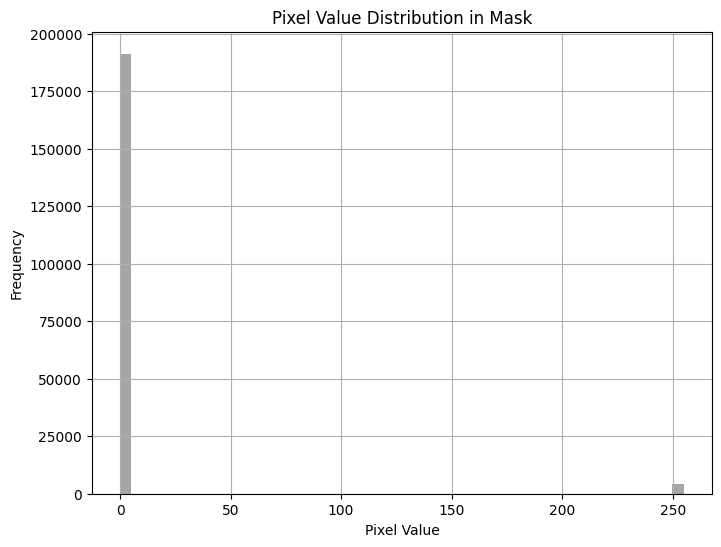

In [23]:
# Plot histogram of pixel intensities in the mask
plt.figure(figsize=(8, 6))
plt.hist(sample_mask.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Pixel Value Distribution in Mask')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### _In the masks, the background colors are either black or white, that is why the histograms are showing 2 values 0 and 255_

## U-net Model architecture

In [24]:
inputs = tf.keras.layers.Input((256, 256, 3))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

# Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ lambda[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0] 

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=60,
    batch_size=16
)

# Save the model
model.save("segmentation_model.h5")
print("Model saved as segmentation_model.h5")


Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 715ms/step - accuracy: 0.9576 - loss: 0.1100 - val_accuracy: 0.9671 - val_loss: 0.1010
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 682ms/step - accuracy: 0.9671 - loss: 0.1052 - val_accuracy: 0.9706 - val_loss: 0.0882
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 680ms/step - accuracy: 0.9752 - loss: 0.0696 - val_accuracy: 0.9773 - val_loss: 0.0725
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 682ms/step - accuracy: 0.9817 - loss: 0.0518 - val_accuracy: 0.9803 - val_loss: 0.0659
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 687ms/step - accuracy: 0.9829 - loss: 0.0489 - val_accuracy: 0.9760 - val_loss: 0.0735
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 682ms/step - accuracy: 0.9830 - loss: 0.0498 - val_accuracy: 0.9831 - val_loss: 0.0645
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 685ms/step - accuracy: 0.9801 - loss: 0.0750 - val_accuracy: 0.9850 - val_loss: 0.0609
Epoch 8/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 690ms/step - accuracy: 0.9815 - loss: 0.0731 - val_accu

Model saved as segmentation_model.h5


### Some other external images

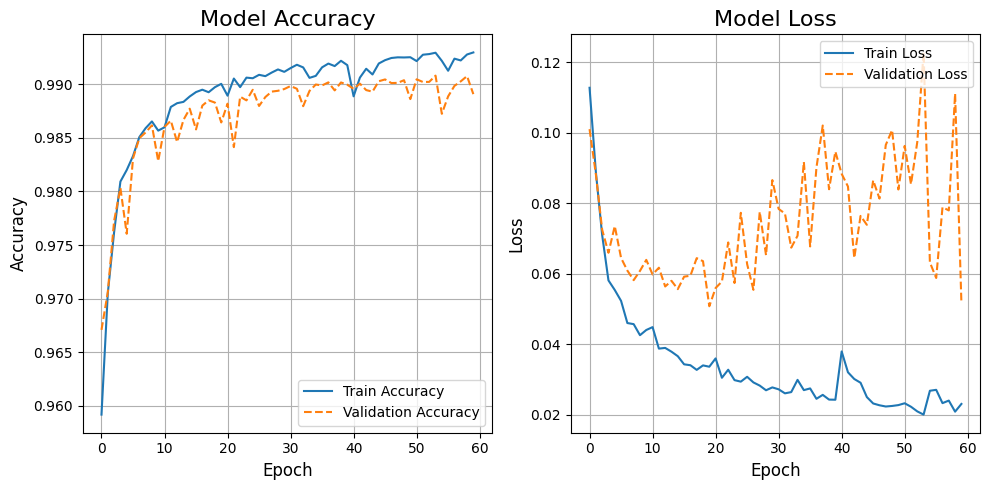

In [ ]:
import matplotlib.pyplot as plt

# Assuming `results` contains the output of model.fit()
# Plot accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Create two plots side by side
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(visible=True)

plt.tight_layout()  # Adjust spacing between plots
plt.show()


Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


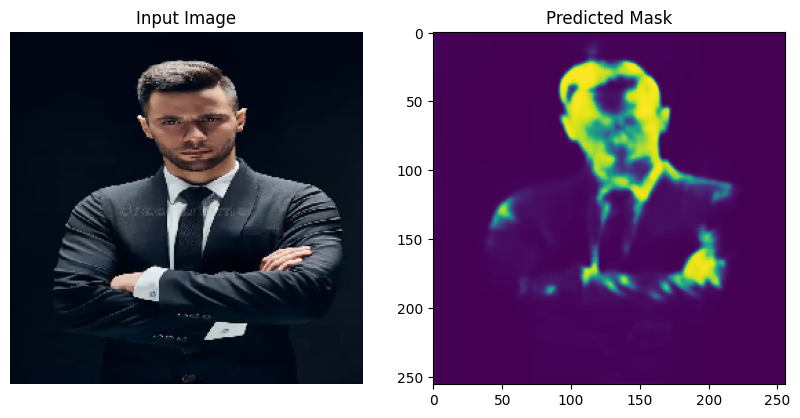

In [45]:
from tensorflow.keras.models import load_model

# saved model loaded
saved_model = load_model("segmentation_model.h5")
print("Model loaded successfully!")

# predict using a custom image
custom_image_path = "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/test/test7.WEBP"
custom_image = tf.keras.preprocessing.image.load_img(custom_image_path, target_size=IMG_SIZE)
custom_image_array = np.expand_dims(np.array(custom_image) / 255.0, axis=0)

# mask prediction
predicted_mask = saved_model.predict(custom_image_array)

# visualizations
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(custom_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask[0, :, :, 0])


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


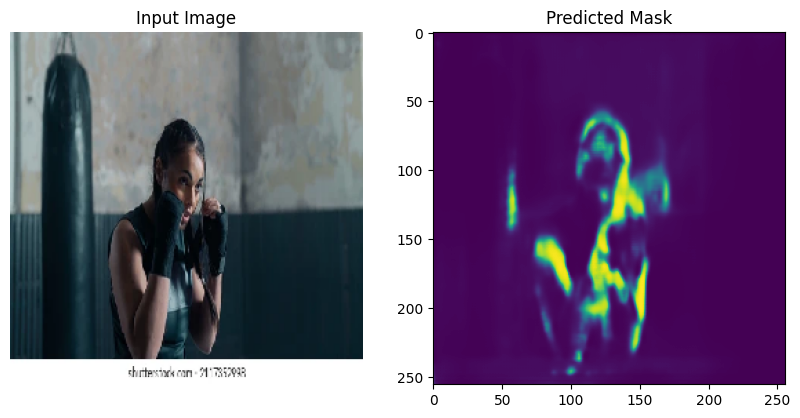

In [ ]:
from tensorflow.keras.models import load_model

# saved model loaded
saved_model = load_model("segmentation_model.h5")
print("Model loaded successfully!")

# predict using a custom image
custom_image_path = "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/test/test3.webp"
custom_image = tf.keras.preprocessing.image.load_img(custom_image_path, target_size=IMG_SIZE)
custom_image_array = np.expand_dims(np.array(custom_image) / 255.0, axis=0)

# mask prediction
predicted_mask = saved_model.predict(custom_image_array)

# visualizations
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(custom_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask[0, :, :, 0])


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


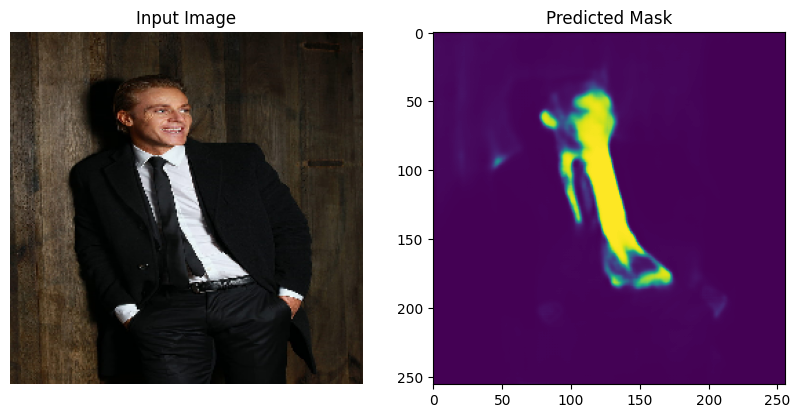

In [62]:
from tensorflow.keras.models import load_model

# saved model loaded
saved_model = load_model("segmentation_model.h5")
print("Model loaded successfully!")

# predict using a custom image
custom_image_path = "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/test/test14.JPEG"
custom_image = tf.keras.preprocessing.image.load_img(custom_image_path, target_size=IMG_SIZE)
custom_image_array = np.expand_dims(np.array(custom_image) / 255.0, axis=0)

# mask prediction
predicted_mask = saved_model.predict(custom_image_array)

# visualizations
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(custom_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask[0, :, :, 0])


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


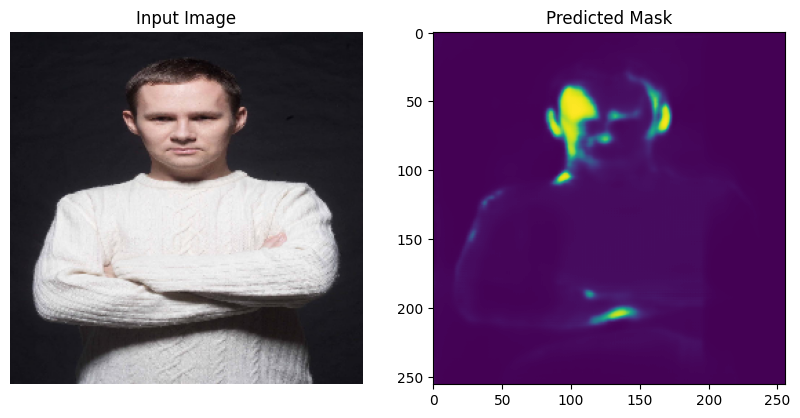

In [64]:
from tensorflow.keras.models import load_model

# saved model loaded
saved_model = load_model("segmentation_model.h5")
print("Model loaded successfully!")

# predict using a custom image
custom_image_path = "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/test/test16.JPEG"
custom_image = tf.keras.preprocessing.image.load_img(custom_image_path, target_size=IMG_SIZE)
custom_image_array = np.expand_dims(np.array(custom_image) / 255.0, axis=0)

# mask prediction
predicted_mask = saved_model.predict(custom_image_array)

# visualizations
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(custom_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask[0, :, :, 0])


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


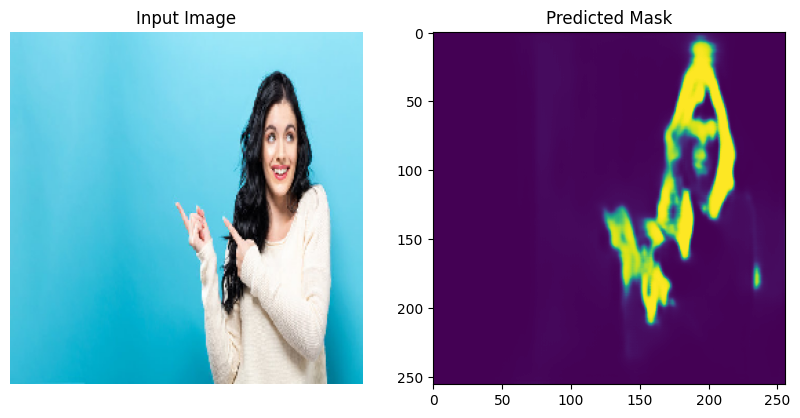

In [26]:
from tensorflow.keras.models import load_model

# saved model loaded
saved_model = load_model("segmentation_model.h5")
print("Model loaded successfully!")

# predict using a custom image
custom_image_path = "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/test/test5.JPEG"
custom_image = tf.keras.preprocessing.image.load_img(custom_image_path, target_size=IMG_SIZE)
custom_image_array = np.expand_dims(np.array(custom_image) / 255.0, axis=0)

# mask prediction
predicted_mask = saved_model.predict(custom_image_array)

# visualizations
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(custom_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask[0, :, :, 0])


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


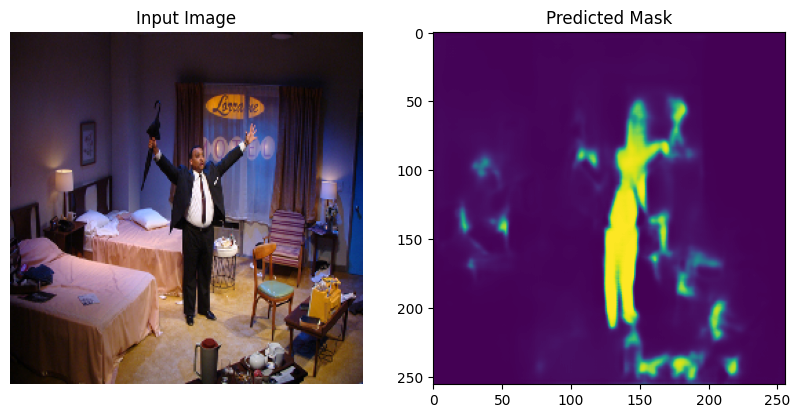

In [49]:
from tensorflow.keras.models import load_model

# saved model loaded
saved_model = load_model("segmentation_model.h5")
print("Model loaded successfully!")

# predict using a custom image
custom_image_path = "C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/Humseg/segmentation_full_body_mads_dataset_1192_img/test/test8.JPEG"
custom_image = tf.keras.preprocessing.image.load_img(custom_image_path, target_size=IMG_SIZE)
custom_image_array = np.expand_dims(np.array(custom_image) / 255.0, axis=0)

# mask prediction
predicted_mask = saved_model.predict(custom_image_array)

# visualizations
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(custom_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask[0, :, :, 0])
